# **Sales Price Prediction Model :**

# Importing Libraries and Dataset :

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv('Advertising.csv')

In [12]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Cleaning and Preprocessing :

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
data.drop(columns="Unnamed: 0",inplace = True)

In [18]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# **EDA (Exploratory Data Analysis ) :**

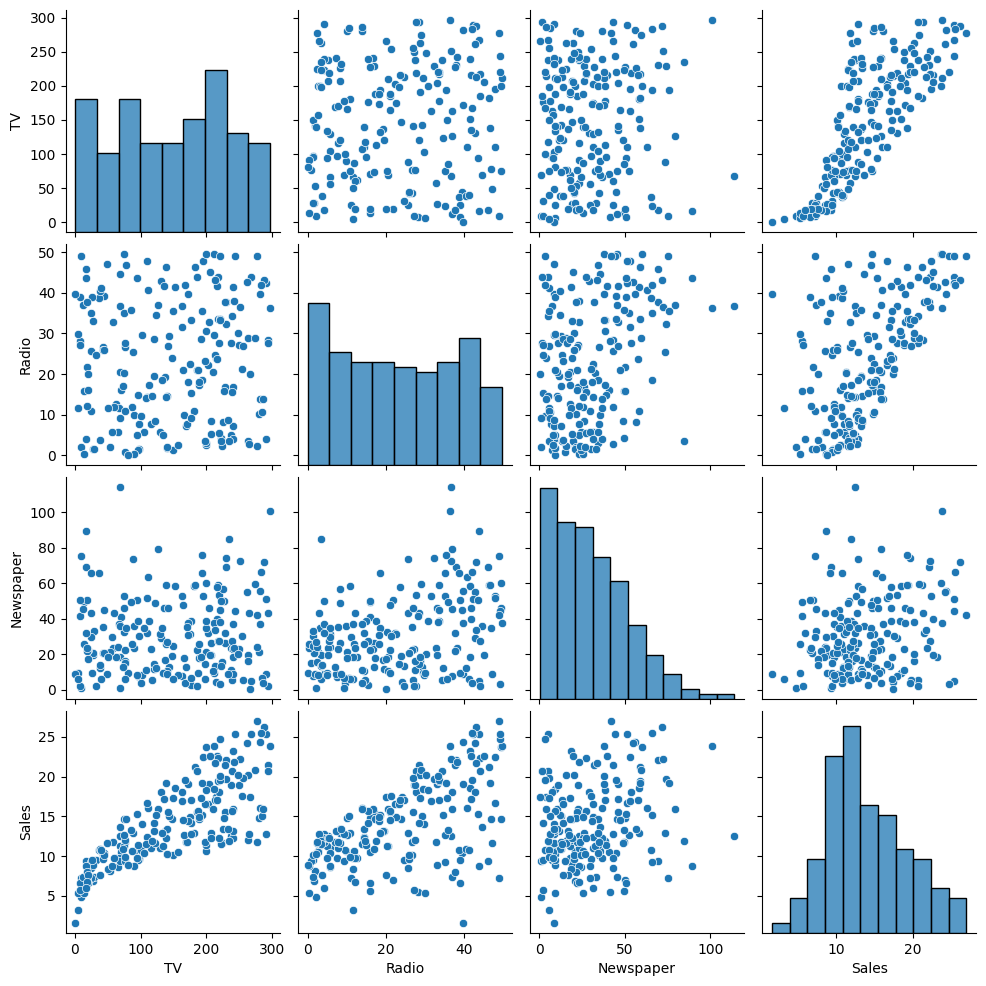

In [9]:
sns.pairplot(data = data)
plt.show()

# Model Development :

In [20]:
x = data.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
y = data['Sales']

In [22]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Hyperparameter Tuning :

In [24]:
para = {"criterion" : ["squared_error", "friedman_mse", "absolute_error"], "splitter" :["best", "random"],"max_depth" : [i for i in range (1,20)]}

In [25]:
model = DecisionTreeRegressor()

In [26]:
rd = RandomizedSearchCV(model,para,n_iter = 20)

In [27]:
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [28]:
rd.best_params_

{'splitter': 'best', 'max_depth': 16, 'criterion': 'absolute_error'}

In [29]:
(rd.best_score_)*100

93.64643846134425

In [30]:
model = DecisionTreeRegressor(splitter="random",max_depth=12,criterion="absolute_error")

In [31]:
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=12,
                      splitter='random')

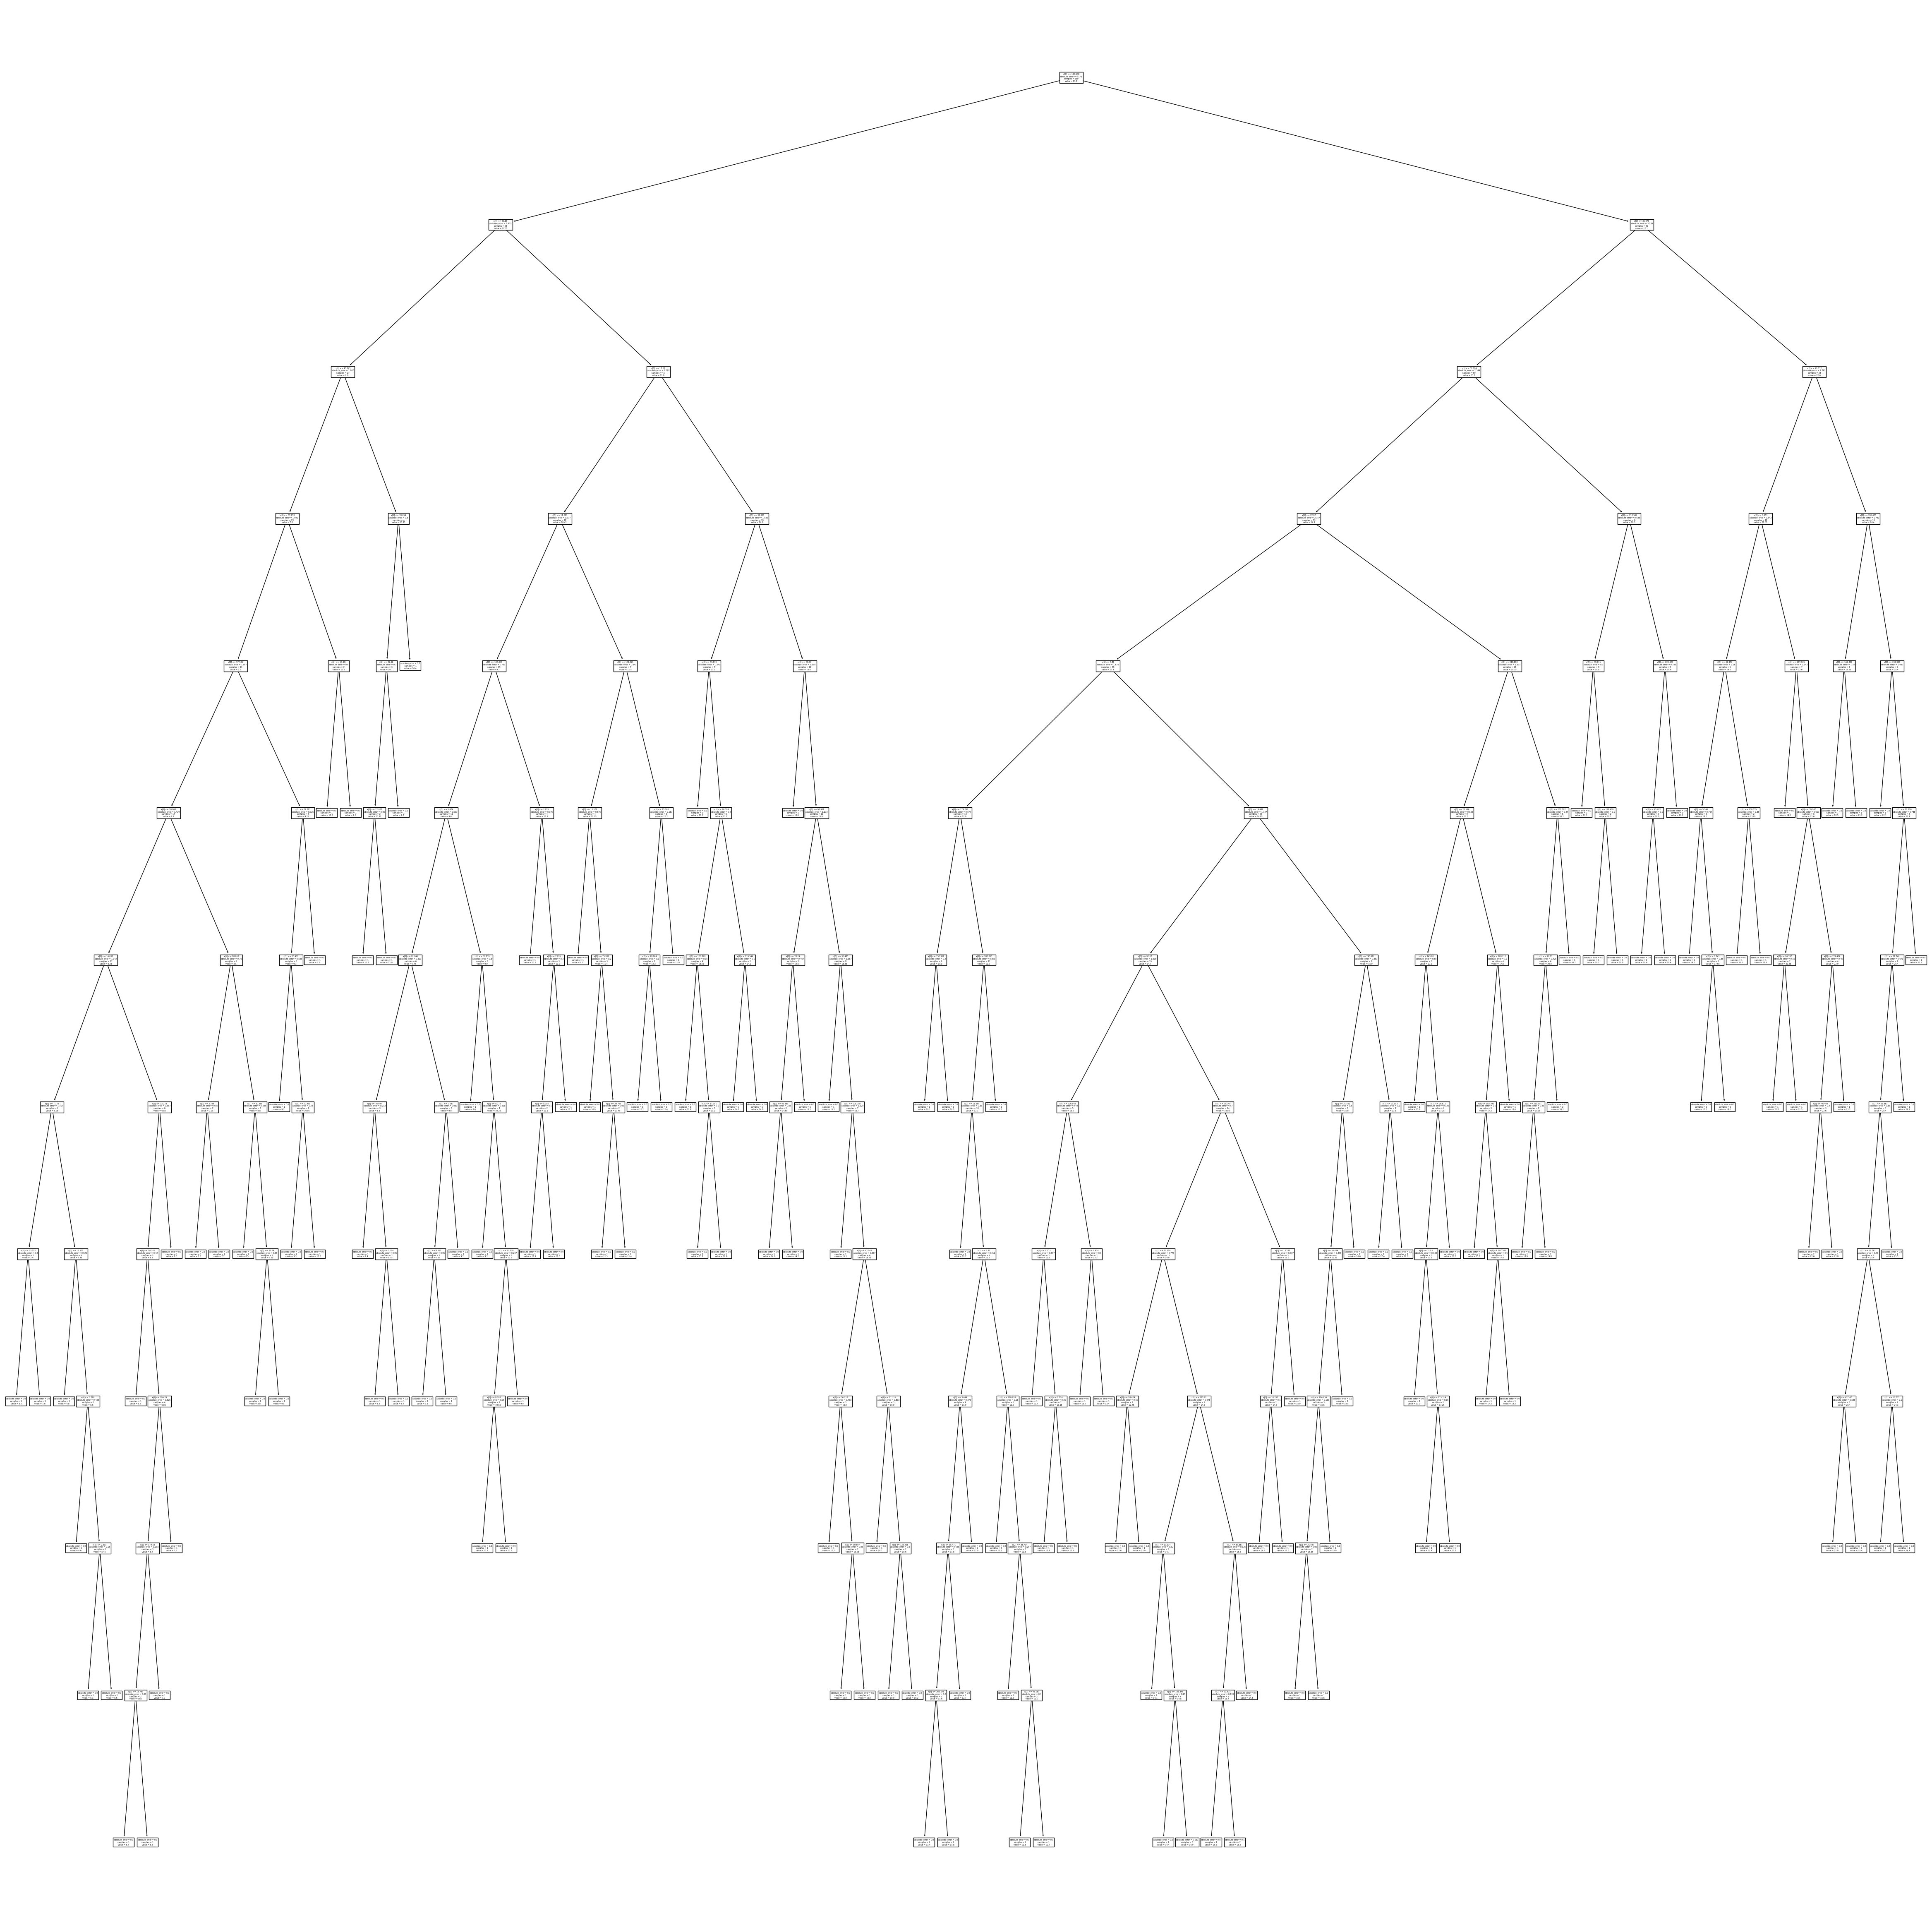

In [50]:
plt.figure(figsize = (60,60))
plot_tree(model)
plt.savefig("DT.jpg")
plt.show()

In [32]:
print("Training Score of our model : ",model.score(x_train,y_train)*100, "\nTesting Score of our model :",model.score(x_test,y_test)*100)

Training Score of our model :  99.9686336733515 
Testing Score of our model : 95.59353507483965


# **Prediction :**

In [33]:
tv = float(input("Television Advertising Rate :"))
radio = float(input("Radio Advertising Rate :"))
newspaper = float(input("Newspaper Advertising Rate :"))

print("The Predict Sales will be :",model.predict([[tv,radio,newspaper]]))

Television Advertising Rate :230.1
Radio Advertising Rate :37.8
Newspaper Advertising Rate :69.2
The Predict Sales will be : [22.1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
